In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_3 = pd.read_csv('../lab2/dataset_phishing.csv').drop('url', axis=1)

le = LabelEncoder()
df_3['status'] = le.fit_transform(df_3['status'])

x = df_3.drop('status', axis=1)
y = df_3['status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

## kNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(scaled_x_train, y_train)

y_pred = knn_model.predict(scaled_x_test)

print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

Matrix:
[[1101   54]
 [  76 1055]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1155
           1       0.95      0.93      0.94      1131

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286

Accuracy: 0.9431321084864392


## Підбір

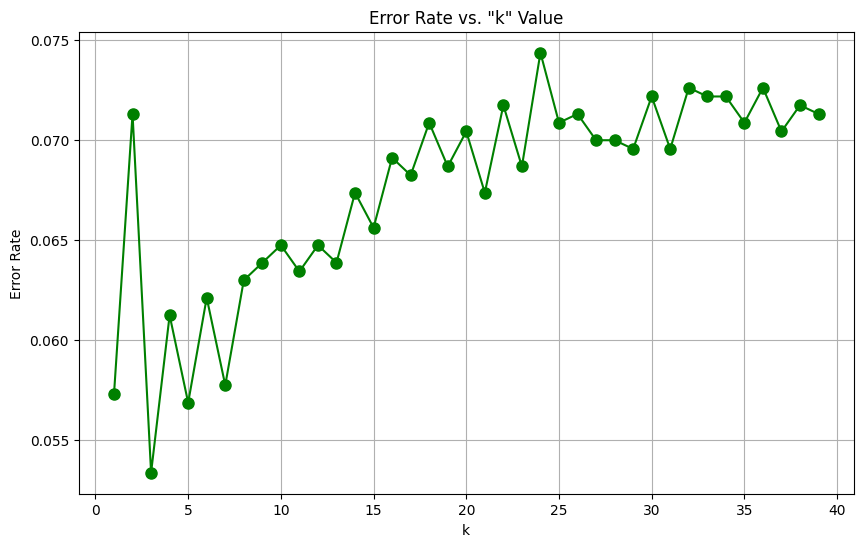

Matrix:
[[1102   53]
 [  69 1062]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1155
           1       0.95      0.94      0.95      1131

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286

Accuracy: 0.9466316710411199


In [7]:
import numpy as np
from matplotlib import pyplot as plt

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train,y_train)
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', markersize=8, color='green')
plt.title('Error Rate vs. "k" Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_x_train, y_train)

y_pred = knn_model.predict(scaled_x_test)
print(f'Matrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')